# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df.shape

(4324, 9)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df.isna().values.any()

True

In [ ]:
df.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
clean_df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
clean_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
valid_df = clean_df[clean_df['Price'].notna()]
valid_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
valid_df.groupby("Organisation").count()['Location']


Organisation
Arianespace         96
Boeing               7
CASC               158
EER                  1
ESA                  1
Eurockot            13
ExPace               1
ILS                 13
ISRO                67
JAXA                 3
Kosmotras           22
Lockheed             8
MHI                 37
Martin Marietta      9
NASA               149
Northrop            83
RVSN USSR            2
Rocket Lab          13
Roscosmos           23
Sandia               1
SpaceX              99
ULA                 98
US Air Force        26
VKS RF              33
Virgin Orbit         1
Name: Location, dtype: int64

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
valid_df.groupby("Rocket_Status").count()['Location']


Rocket_Status
StatusActive     586
StatusRetired    378
Name: Location, dtype: int64

In [ ]:
valid_df["Price"].min()

'1,160.0'

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
valid_df.groupby("Mission_Status").count()['Location']


Mission_Status
Failure               36
Partial Failure       17
Prelaunch Failure      1
Success              910
Name: Location, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
hist = px.histogram(valid_df.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x='Price', nbins=30)
hist.show()

In [ ]:
valid_df.head()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
launch_countries = valid_df.Location.str.split(", ").str[-1]
launch_countries.head()


0           USA
1         China
3    Kazakhstan
4           USA
5         China
Name: Location, dtype: object

In [ ]:
launch_countries_updated = launch_countries.replace({'Russia':'Russian Federation', 'New Mexico':'USA', 'Yellow Sea':'China', 'Shahrud Missile Test Site':'Iran', 'Pacific Missile Range Facility':'USA', 'Barents Sea':'Russian Federation', 'Gran Canaria':'USA'})

In [ ]:
codes = {}
for country in launch_countries_updated:
  codes[country] = countries.get(country).alpha3

print(codes)


{'USA': 'USA', 'China': 'CHN', 'Kazakhstan': 'KAZ', 'Japan': 'JPN', 'New Zealand': 'NZL', 'Russian Federation': 'RUS', 'France': 'FRA', 'India': 'IND'}


In [ ]:
country_codes = launch_countries_updated.replace(codes)

In [ ]:
country_codes.head()
country_codes.tail()

3855    USA
3971    USA
3993    USA
4000    USA
4020    USA
Name: Location, dtype: object

In [ ]:
valid_df["Countries"] = country_codes
valid_df.head()

<ipython-input-16-789551683f26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["Countries"] = country_codes


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Countries
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN


In [ ]:
launches = valid_df["Countries"].value_counts().rename_axis("Countries").reset_index(name='counts')
launches.head()

,Countries,counts
0,USA,490
1,CHN,159
2,FRA,95
3,IND,67
4,RUS,54


In [ ]:
launches.counts.sum()

964

In [ ]:
fig = px.choropleth(launches, locations="Countries",
                    color= "counts", 
                    hover_name="Countries", 
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
fails_df = valid_df[valid_df.Mission_Status != "Success"]

In [ ]:
fails = fails_df["Countries"].value_counts().rename_axis("Countries").reset_index(name='counts')
fails.head()

,Countries,counts
0,USA,28
1,IND,8
2,CHN,7
3,FRA,3
4,KAZ,3


In [ ]:
fig = px.choropleth(fails, locations="Countries",
                    color= "counts", 
                    hover_name="Countries", 
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
sunburst = valid_df.groupby(by=["Countries", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()

,Countries,Organisation,Mission_Status,size
2,CHN,CASC,Success,152
39,USA,NASA,Success,146
49,USA,ULA,Success,97
47,USA,SpaceX,Success,93
6,FRA,Arianespace,Success,91


In [ ]:
burst = px.sunburst(sunburst, 
                    path=['Countries', 'Organisation', 'Mission_Status'], 
                    values='size',
                    title='Missoins by Country',
                    )
  
burst.update_layout(xaxis_title='Missoins by Country', 
                    yaxis_title='c1 c2 c3',
                    coloraxis_showscale=False)
  
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
valid_df["Price"] = valid_df["Price"].str.replace(",","").astype(float)


<ipython-input-20-3514c9e8de9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["Price"] = valid_df["Price"].str.replace(",","").astype(float)


In [ ]:
money_per_organization = valid_df.groupby(by="Organisation")["Price"].sum()
money_per_organization.head()

Organisation
Arianespace   16,345.00
Boeing         1,241.00
CASC           6,340.26
EER               20.00
ESA               37.00
Name: Price, dtype: float64

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
organzation_launches = valid_df.groupby(by="Organisation")["Price"].count()
organzation_launches.head()

Organisation
Arianespace     96
Boeing           7
CASC           158
EER              1
ESA              1
Name: Price, dtype: int64

In [ ]:
money_per_launch = money_per_organization/organzation_launches
money_per_launch.head()

Organisation
Arianespace   170.26
Boeing        177.29
CASC           40.13
EER            20.00
ESA            37.00
Name: Price, dtype: float64

# Chart the Number of Launches per Year

In [ ]:
clean_df['Date'] = pd.to_datetime(clean_df['Date'])

In [ ]:
clean_df['Year'] = clean_df['Date'].apply(lambda x: x.year)
clean_df['Month'] = clean_df['Date'].apply(lambda x: x.month)
clean_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,7


In [ ]:
launches_per_year = clean_df["Year"].value_counts().rename_axis("Year").reset_index(name='Launches')
launches_per_year.head()

,Year,Launches
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113


<BarContainer object of 64 artists>

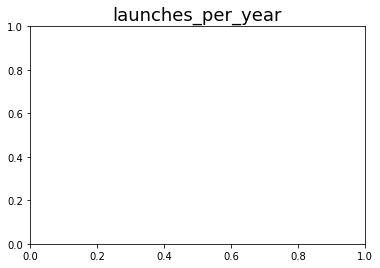

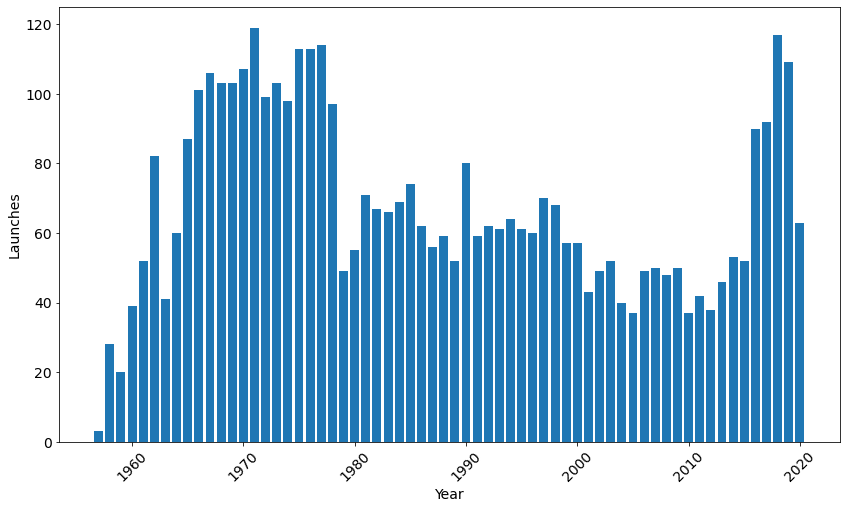

In [ ]:
plt.title('launches_per_year', fontsize=18)
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Launches', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.bar(launches_per_year.Year, launches_per_year.Launches)


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
launches_per_month = clean_df["Month"].value_counts().rename_axis("Month").reset_index(name='Launches')
launches_per_month.head()

,Month,Launches
0,12,450
1,6,402
2,4,383
3,10,381
4,8,373


<BarContainer object of 12 artists>

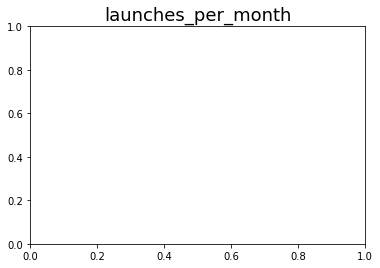

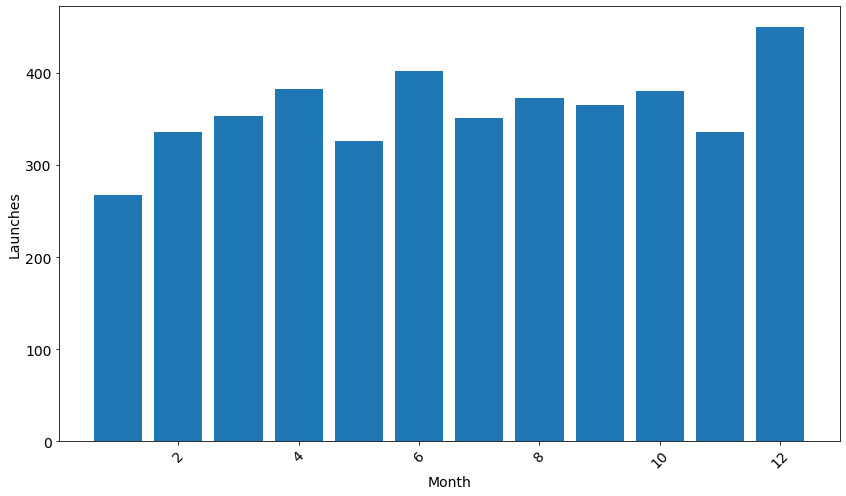

In [ ]:
plt.title('launches_per_month', fontsize=18)
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Launches', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.bar(launches_per_month.Month, launches_per_month.Launches)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
valid_df['Date'] = pd.to_datetime(valid_df['Date'])
valid_df['Year'] = valid_df['Date'].apply(lambda x: x.year)
valid_df['Month'] = valid_df['Date'].apply(lambda x: x.month)
valid_df.head()

<ipython-input-30-4a698a4d963a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Date'] = pd.to_datetime(valid_df['Date'])
<ipython-input-30-4a698a4d963a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Year'] = valid_df['Date'].apply(lambda x: x.year)
<ipython-input-30-4a698a4d963a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Countries,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,7
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,2020,7


In [ ]:
average_price = valid_df.groupby('Year').agg({'Price':pd.Series.mean})

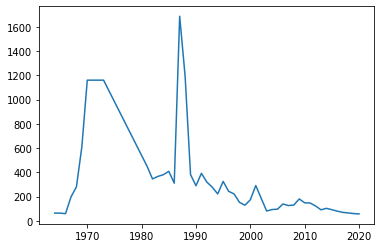

In [ ]:
plt.plot(average_price.index,average_price.Price)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
organzation_launches = clean_df.groupby(by="Organisation")["Date"].count()

top_10_org = organzation_launches.sort_values(ascending=False)
top_10_org

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
ISA                   13
Rocket Lab            13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
Land Launch            7
MITT                   7
JAXA                   7
UT                     5
CASIC                  5
KCST                   5
CECLES                 4
Exos                   4
Arm??e de l'

In [ ]:
organzation_launches = clean_df.groupby(by="Organisation")["Date"].count()
top_10_org = organzation_launches.sort_values(ascending=False)[0:10].index
top_10_org = top_10_org.values.tolist()
top_10_org

['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [ ]:
top_10_df = clean_df[clean_df["Organisation"].isin(top_10_org)]
top_10_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,7
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020,7
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success,2020,7
12,CASC,"LC-3, Xichang Satellite Launch Center, China",2020-07-09 12:11:00+00:00,Long March 3B/E | Apstar-6D,StatusActive,29.15,Success,2020,7


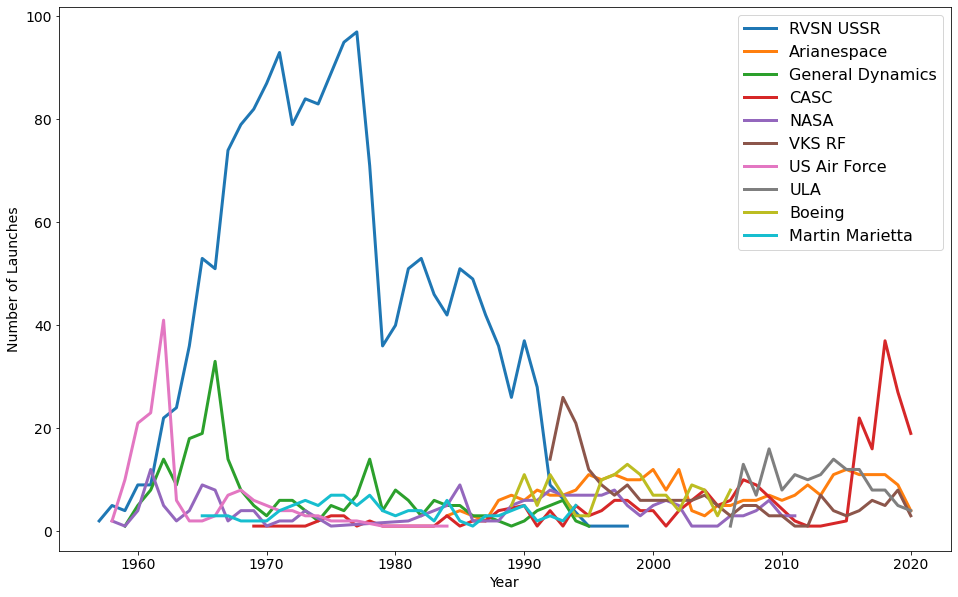

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

for org in top_10_org:
  org_launches = top_10_df[top_10_df["Organisation"] == org]
  org_launches = org_launches.groupby("Year").count()["Organisation"].reset_index(name='Launches')

  plt.plot(org_launches.Year,org_launches.Launches, linewidth=3, label=org)



plt.legend(fontsize=16)


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
launch_countries = clean_df.Location.str.split(", ").str[-1]
launch_countries_updated = launch_countries.replace({'Russia':'Russian Federation', 'New Mexico':'USA', 'Pacific Ocean':'USA', 'Yellow Sea':'China', 'Shahrud Missile Test Site':'Iran, Islamic Republic of', 'Iran': 'Iran, Islamic Republic of', 'North Korea':'Korea, Republic of', 'South Korea':"Korea, Democratic People's Republic of", 'Pacific Missile Range Facility':'USA', 'Barents Sea':'Russian Federation', 'Gran Canaria':'USA'})
codes = {}
for country in launch_countries_updated:
  codes[country] = countries.get(country).alpha3
  
country_codes = launch_countries_updated.replace(codes)
clean_df["Countries"] = country_codes

In [ ]:
cold_war_df = clean_df[(clean_df["Countries"].isin(["USA", "RUS"])) & (clean_df["Year"] < 1992)]
cold_war_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Countries
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,1991,12,RUS
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1991,12,USA
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,1991,11,USA
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,1991,11,RUS
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00+00:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.0,Success,1991,11,USA
...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,1958,3,USA
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,1958,3,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958,2,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958,2,USA


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
cold_war_count = cold_war_df["Countries"].value_counts().rename_axis("Country").reset_index(name='counts')
cold_war_count

,Country,counts
0,RUS,1188
1,USA,662


In [ ]:
fig = px.pie(labels=cold_war_count.Country, 
             values=cold_war_count.counts,
             title="USA vs USSR",
             names=cold_war_count.Country,
             hole=0.6,
             )
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=15)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
cold_war_launches = cold_war_df.groupby(["Countries", "Year"]).count()["Date"].reset_index(name='counts')
cold_war_launches

,Countries,Year,counts
0,RUS,1961,2
1,RUS,1962,8
2,RUS,1963,8
3,RUS,1964,8
4,RUS,1965,10
...,...,...,...
61,USA,1987,6
62,USA,1988,7
63,USA,1989,16
64,USA,1990,26


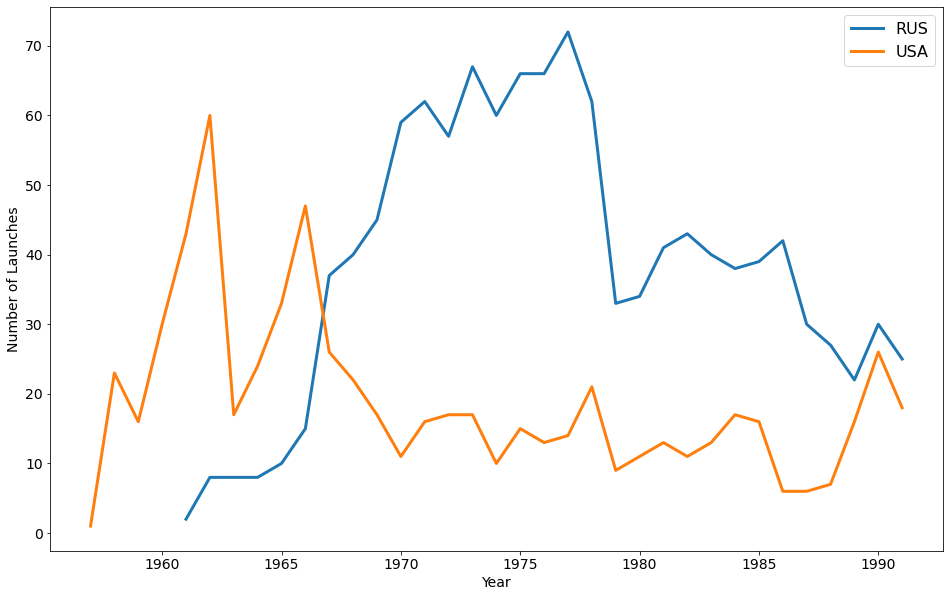

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

for super_power in ["RUS", "USA"]:
  launches = cold_war_launches[cold_war_launches["Countries"] == super_power]

  plt.plot(launches.Year,launches.counts, linewidth=3, label=super_power)



plt.legend(fontsize=16)

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
cold_war_fails = cold_war_df[cold_war_df["Mission_Status"] != "Success"].groupby(["Countries", "Year"]).count()["Date"].reset_index(name='counts')
cold_war_fails

,Countries,Year,counts
0,RUS,1961,2
1,RUS,1962,1
2,RUS,1963,4
3,RUS,1964,1
4,RUS,1965,3
5,RUS,1966,2
6,RUS,1967,4
7,RUS,1968,3
8,RUS,1969,5
9,RUS,1970,7


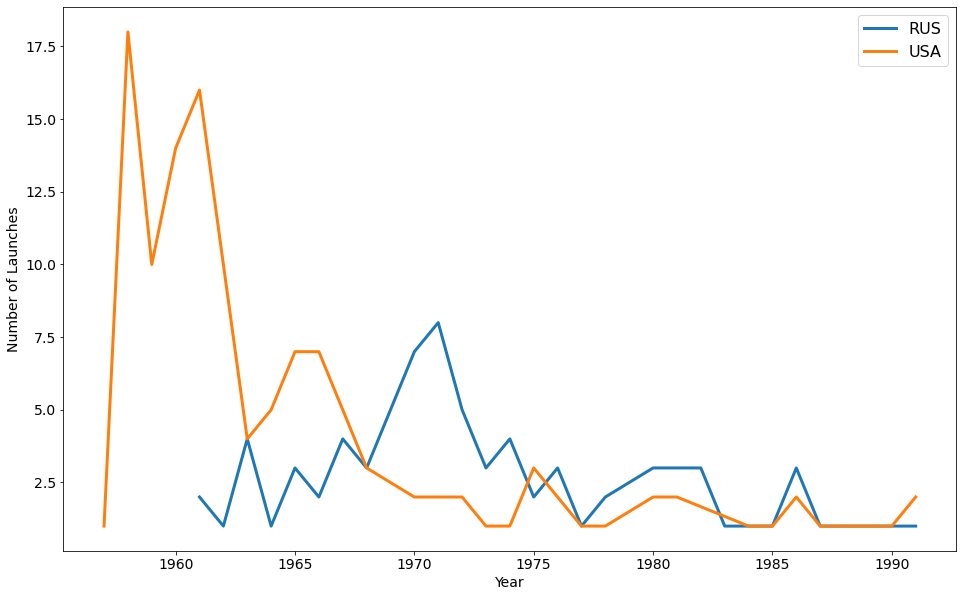

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

for super_power in ["RUS", "USA"]:
  fails = cold_war_fails[cold_war_fails["Countries"] == super_power]

  plt.plot(fails.Year,fails.counts, linewidth=3, label=super_power)



plt.legend(fontsize=16)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
total_launches = cold_war_launches.groupby("Year").sum()
total_launches

,counts
Year,
1957,1
1958,23
1959,16
1960,30
1961,45
1962,68
1963,25
1964,32
1965,43


In [ ]:
total_fails = cold_war_fails.groupby("Year").sum()
total_fails

,counts
Year,
1957,1
1958,18
1959,10
1960,14
1961,18
1962,11
1963,8
1964,6
1965,10


In [ ]:
fail_precentage = ((total_fails.counts/total_launches.counts)*100).reset_index(name='precentage')
fail_precentage

,Year,precentage
0,1957,100.00
1,1958,78.26
2,1959,62.50
3,1960,46.67
4,1961,40.00
5,1962,16.18
6,1963,32.00
7,1964,18.75
8,1965,23.26
9,1966,14.52


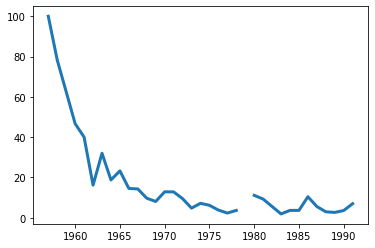

In [ ]:
plt.plot(fail_precentage.Year,fail_precentage.precentage, linewidth=3, label="fail precentage")

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
country_launches = clean_df.groupby(["Year", "Countries"]).count()["Date"].reset_index(name='Launches')
country_launches

,Year,Countries,Launches
0,1957,KAZ,2
1,1957,USA,1
2,1958,KAZ,5
3,1958,USA,23
4,1959,KAZ,4
...,...,...,...
407,2020,JPN,3
408,2020,KAZ,6
409,2020,NZL,3
410,2020,RUS,3


In [ ]:
max_launches_country = country_launches.loc[country_launches.groupby("Year")["Launches"].idxmax()]
max_launches_country

,Year,Countries,Launches
0,1957,KAZ,2
3,1958,USA,23
5,1959,USA,16
7,1960,USA,30
10,1961,USA,43
...,...,...,...
376,2016,USA,27
385,2017,USA,30
386,2018,CHN,39
394,2019,CHN,34


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
org_launches = clean_df.groupby(["Year", "Organisation"]).count()["Date"].reset_index(name='Launches')
org_launches

,Year,Organisation,Launches
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [ ]:
max_launches_org = org_launches.loc[org_launches.groupby("Year")["Launches"].idxmax()]
max_launches_org

,Year,Organisation,Launches
0,1957,RVSN USSR,2
6,1958,US Navy,12
10,1959,US Air Force,10
15,1960,US Air Force,21
19,1961,US Air Force,23
...,...,...,...
583,2016,CASC,22
611,2017,SpaceX,18
616,2018,CASC,37
632,2019,CASC,27


In [ ]:
scatter = px.scatter(max_launches_org, # data
                        x=max_launches_org.Year, # column name
                        y=max_launches_org.Organisation,
                        title='scatter',
                        size=max_launches_org.Launches,
                        hover_name=max_launches_org.index,
                        color=max_launches_org.Launches)
     
scatter.update_layout(xaxis_title="title",
                          yaxis_title="Launches",
                          yaxis=dict(type='log'))
scatter.show()